<a href="https://colab.research.google.com/github/NombuleloZizi/Prediction-of-Product-Sales/blob/main/Project1Part6Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

#Prediction of Product Sales


#Part 1: Project 1 & 2

*   Author: Nombulelo Zizi


### Data Dictionary

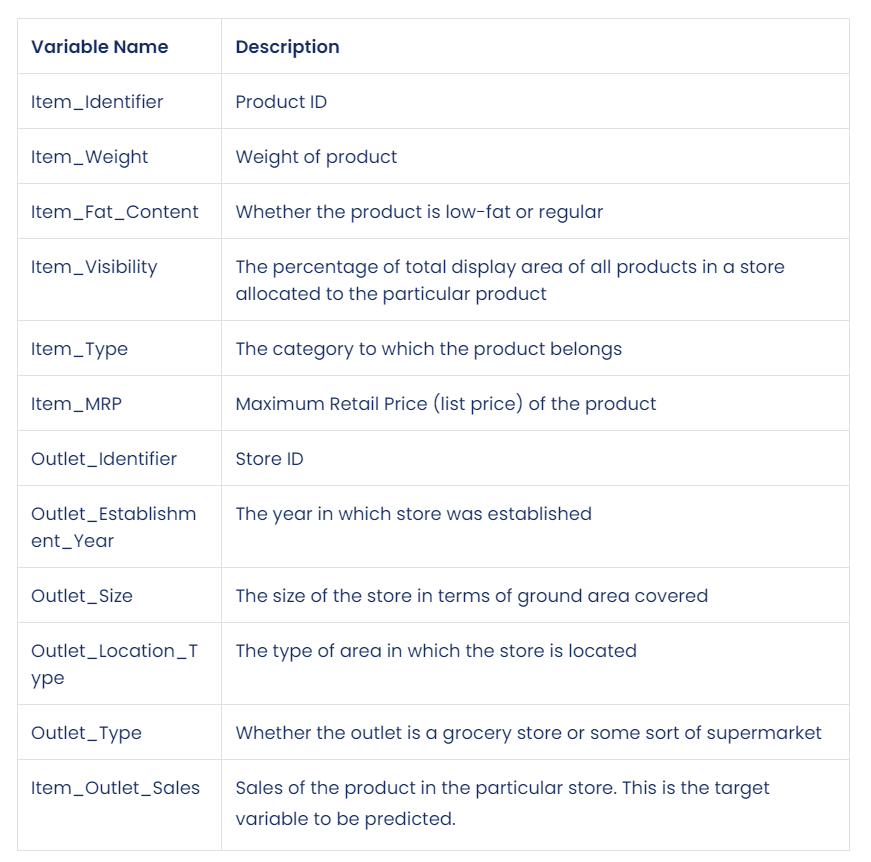

## Imports


In [ ]:
# Import required packages
import pandas as pd # import pandas
import missingno as msno # import missingo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
## Warnings
import warnings
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
#set_config(display='diagram')

## **Notebook Defaults and Runtime Configurations**

##### **Warnings**

In [ ]:
## Set filter warnings to ignore
warnings.filterwarnings('ignore')

In [ ]:
## Display all columns
pd.set_option('display.max_column', None)

##### **MatPlotLib rcParams**

- **Customizing Matplotlib with style sheets and rcParams**

In [ ]:
## Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 12,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 12,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

## Loading Data

In [ ]:
#load the data file path
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
#read the file
df_sales = pd.read_csv(fpath)
#preview the first row
df_sales.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Inspect the Data**

In [ ]:
df_sales.shape

(8523, 12)


**How many rows are there?**
- `8523`

**How many columns are there?**
- `12`

**How many numeric columns?**
- `5`

**How many categorical/string columns are there (dtype='object')?**
- `7`


In [ ]:
# Use .select_dtypes to view only object columns
# Identify string columns
cat_cols = df_sales.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# save list of numeric column names
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

## Data Cleaning

### Duplicated Data
Checking for duplicated data:

In [ ]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df_sales.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

0

### Missing Values
Checking for missing values:

In [ ]:
# Get the number of null values for all columns and save as a variable
null_sums = df_sales.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

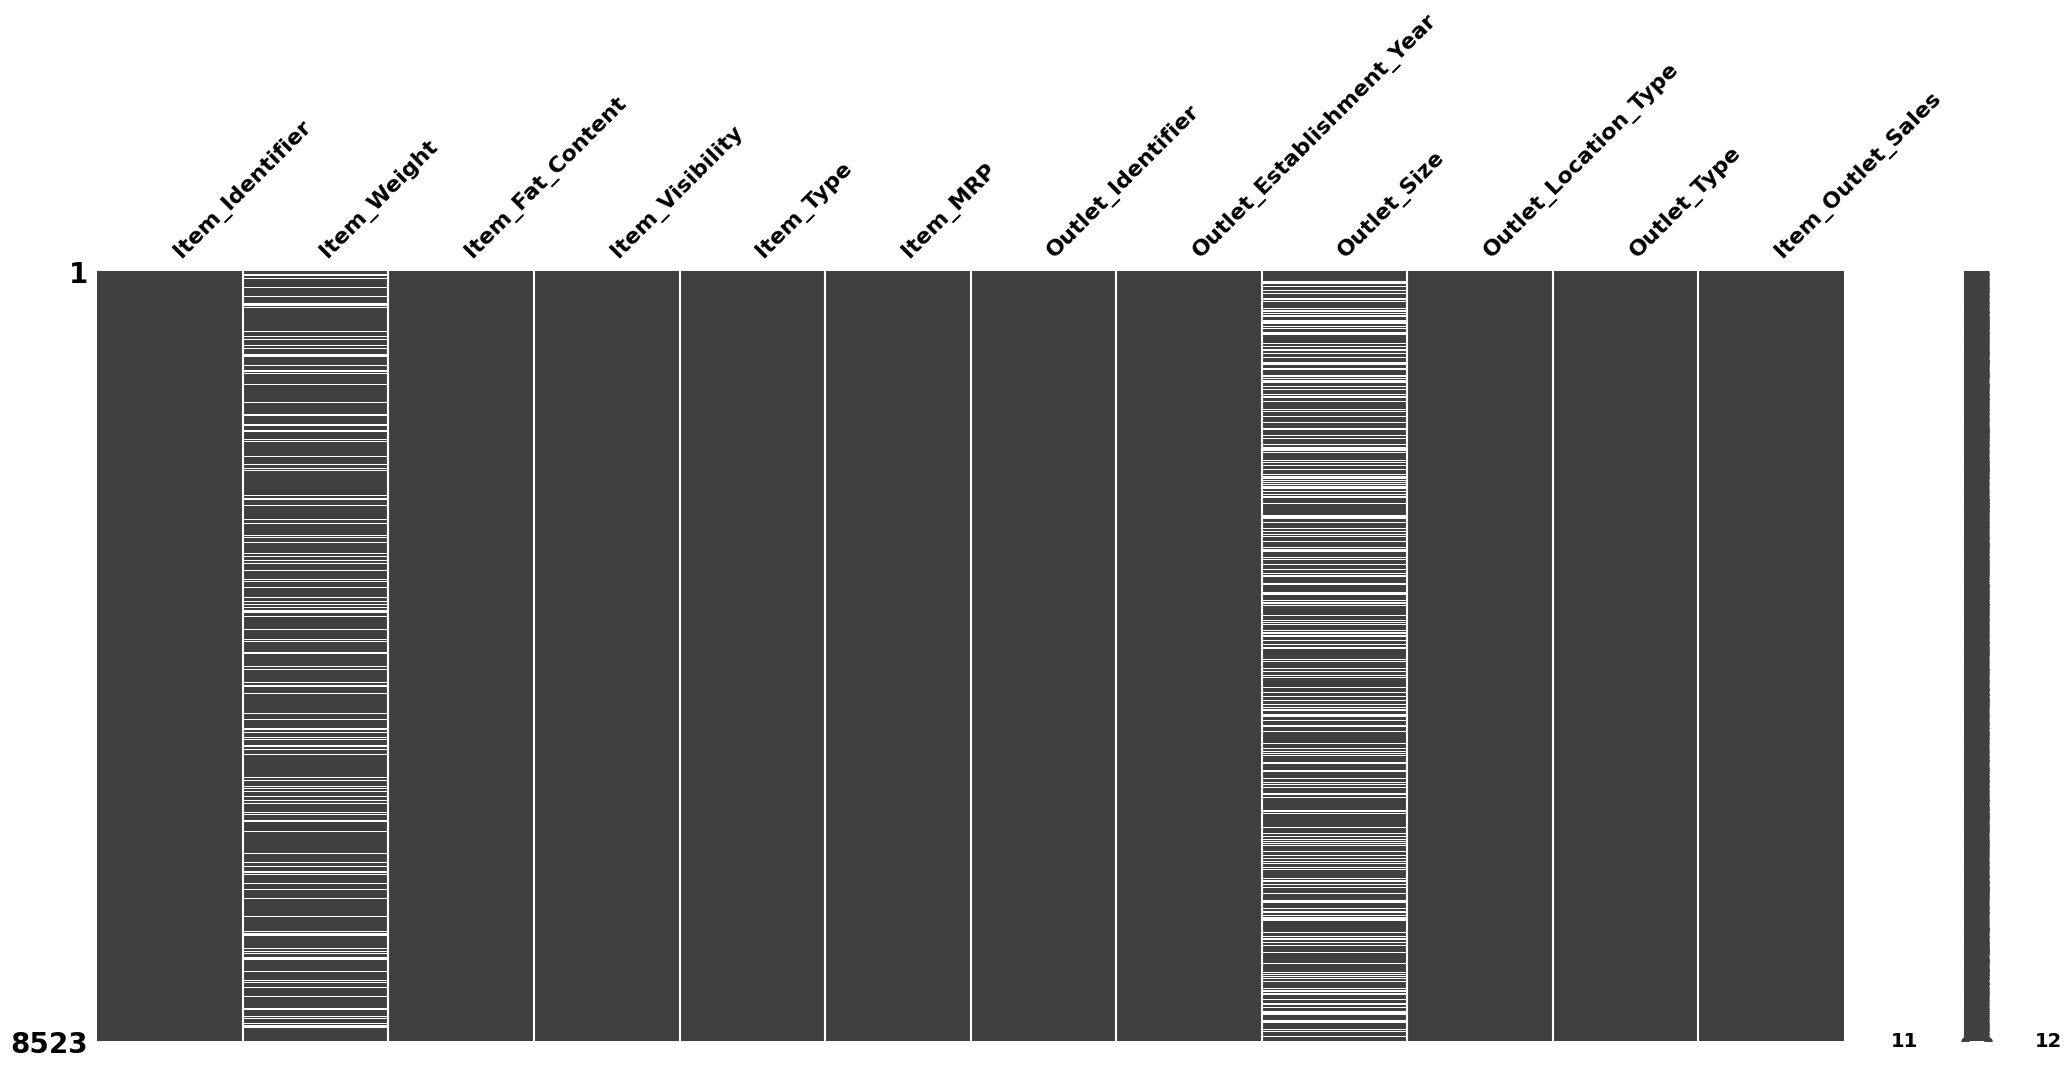

In [ ]:
msno.matrix(df_sales);

In [ ]:
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# use the list of cat columns to fill null values with MISSING
df_sales[cat_cols] = df_sales[cat_cols].fillna("MISSING")


In [ ]:
# save list of numeric column names
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# use the list of num columns to fill null values with -1
df_sales[num_cols] = df_sales[num_cols].fillna(-1)


In [ ]:
# Confirm no more nulls using Pandas
null_sums_all = df_sales.isna().sum()
null_sums_all

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Fixing Data Types

In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
string_cols = df_sales.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


### Inspecting Categorical Columns & Addressing Inconsistent Values

In [ ]:
# Check for inconsistencies by inspecting the values_counts for Item_Fat_Content
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Standardize the values in the Central column
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat",'reg':'Regular','low fat':'Low Fat'})
df_sales['Item_Fat_Content'].value_counts()



Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean).
for col in num_cols:
  print(f"Summary statistics for {col}:")
  print(f"Min: {df_sales[col].min()}")
  print(f"Max: {df_sales[col].max()}")
  print(f"Mean: {df_sales[col].mean().round(2)}")
  # Increasing readability by adding an empty line
  print('\n')

Summary statistics for Item_Weight:
Min: -1.0
Max: 21.35
Mean: 10.48


Summary statistics for Item_Visibility:
Min: 0.0
Max: 0.328390948
Mean: 0.07


Summary statistics for Item_MRP:
Min: 31.29
Max: 266.8884
Mean: 140.99


Summary statistics for Outlet_Establishment_Year:
Min: 1985
Max: 2009
Mean: 1997.83


Summary statistics for Item_Outlet_Sales:
Min: 33.29
Max: 13086.9648
Mean: 2181.29




#Part 1: Project 3

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.


In [ ]:
# Checking info again
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Explanatory Data Analysis

- Histograms to view the distributions of numerical features in your dataset.

In [ ]:
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

- For each numeric feature, we will plot the distribution and a boxplot.

In [ ]:
def plot_numeric(df,col):
  """EDA function to plot a histogram and boxplot for the selected column"""
  ## make the figure and axes sharing the same x-axis
  fig, axes = plt.subplots(nrows=2, figsize=(10,5), sharex=True)

  ## Use seaborn plots with ax=axes[i]
  sns.histplot(data=df,x = col,ax = axes[0])
  mean_value = df[col].mean()
  axes[0].axvline(mean_value,color='red', ls='--',
           label=f"Mean Value = ${mean_value:,.2f}",);

  med_value = df[col].median()
  axes[0].axvline(med_value,color='black', ls='--',
           label=f"Median Value = ${med_value:,.2f}");


  sns.boxplot(data=df, x = col, ax = axes[1])

  ## Updating title of top graph
  axes[0].set_title(f'EDA for {col}')

  ## Fixing any overlapping labels and showing
  plt.tight_layout()
  plt.show()

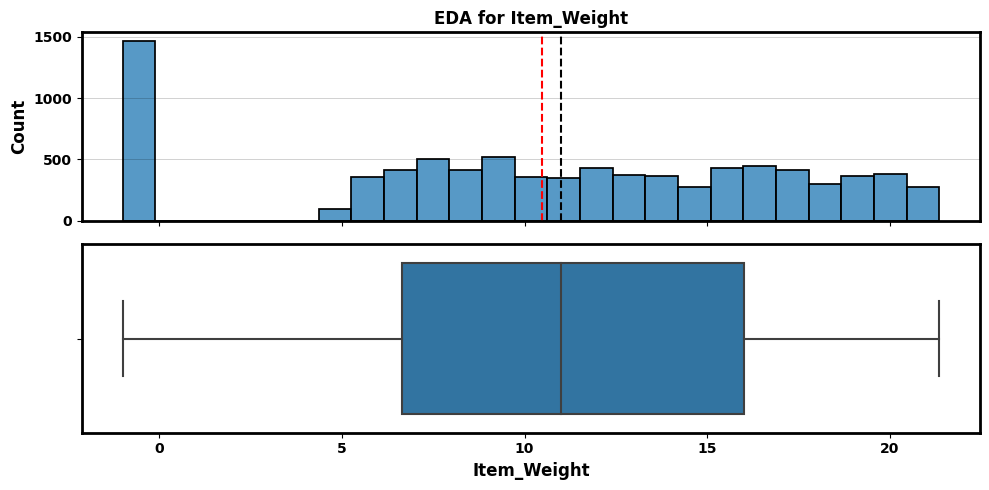

In [ ]:
plot_numeric(df_sales,'Item_Weight')

- You can clearly see that the median is around 12.5 for this particular column.
- The boxplot doesn't shows that there are some outliers in terms of Item_Weight.

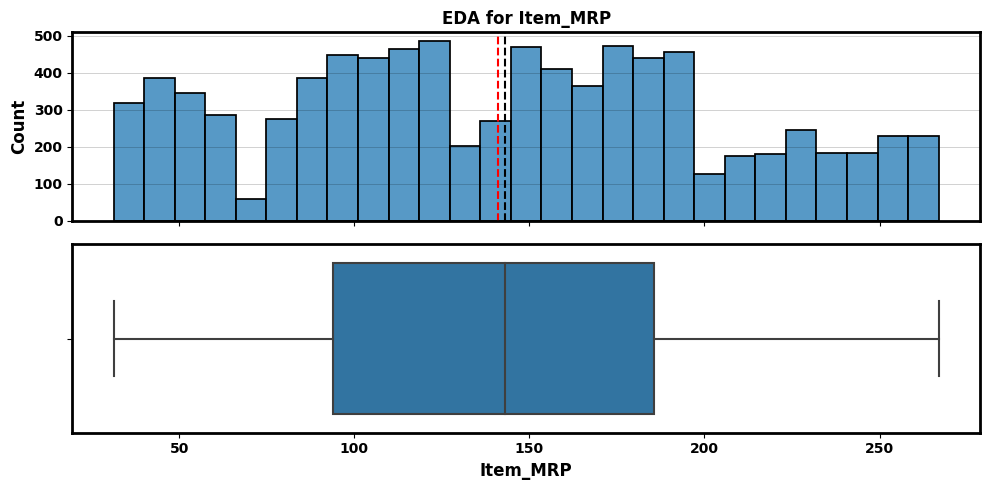

In [ ]:
plot_numeric(df_sales,'Item_MRP')


- You can clearly see that the median is around 140 for this particular column.
- The boxplot doesn't shows that there are some outliers in terms of Item_MRP.

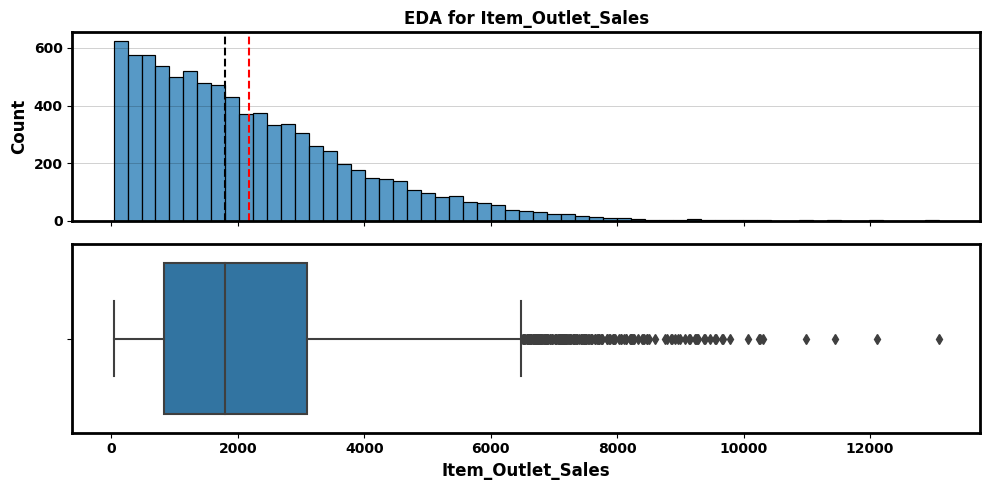

In [ ]:
plot_numeric(df_sales,'Item_Outlet_Sales')

Visual

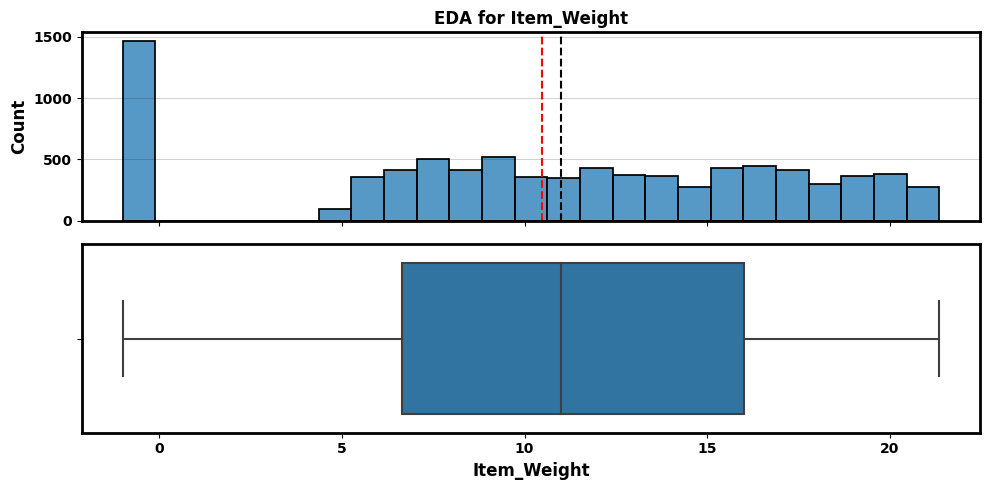

- You can clearly see that the median is around 1800 for this particular column.
- The boxplot shows that there are some outliers in terms of Item_Outlet_Sales.

#### Visualizing with Barplots
- We will view the categorical counts of all of the object type columns and visualize this information with a barplot.

In [ ]:
## functionize a barplot and call it plot_bar

def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplota
    counts = df_sales[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


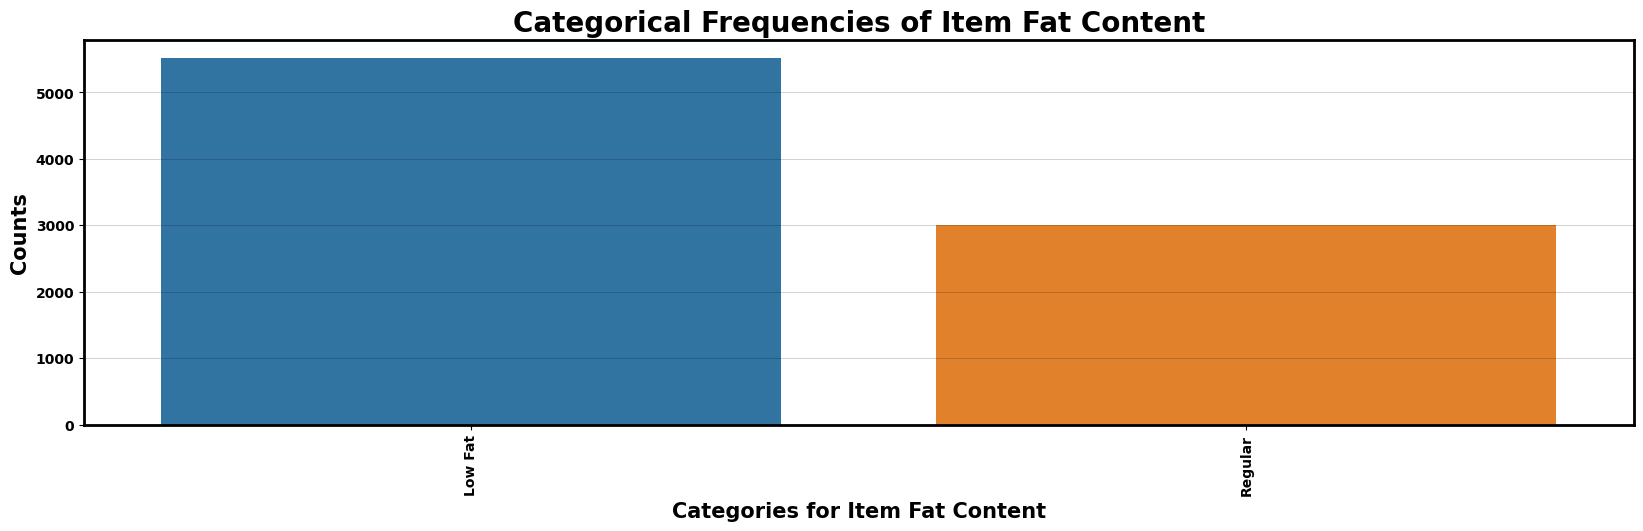

In [ ]:
fig, ax = plot_bar(df_sales, 'Item_Fat_Content', 'Item Fat Content');
print(df_sales['Item_Fat_Content'].value_counts())

- From this graph, we can see that there are mostly Low Fat content.
- Also, we see that the least amount for Item Fat Content is in the low fat category.

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


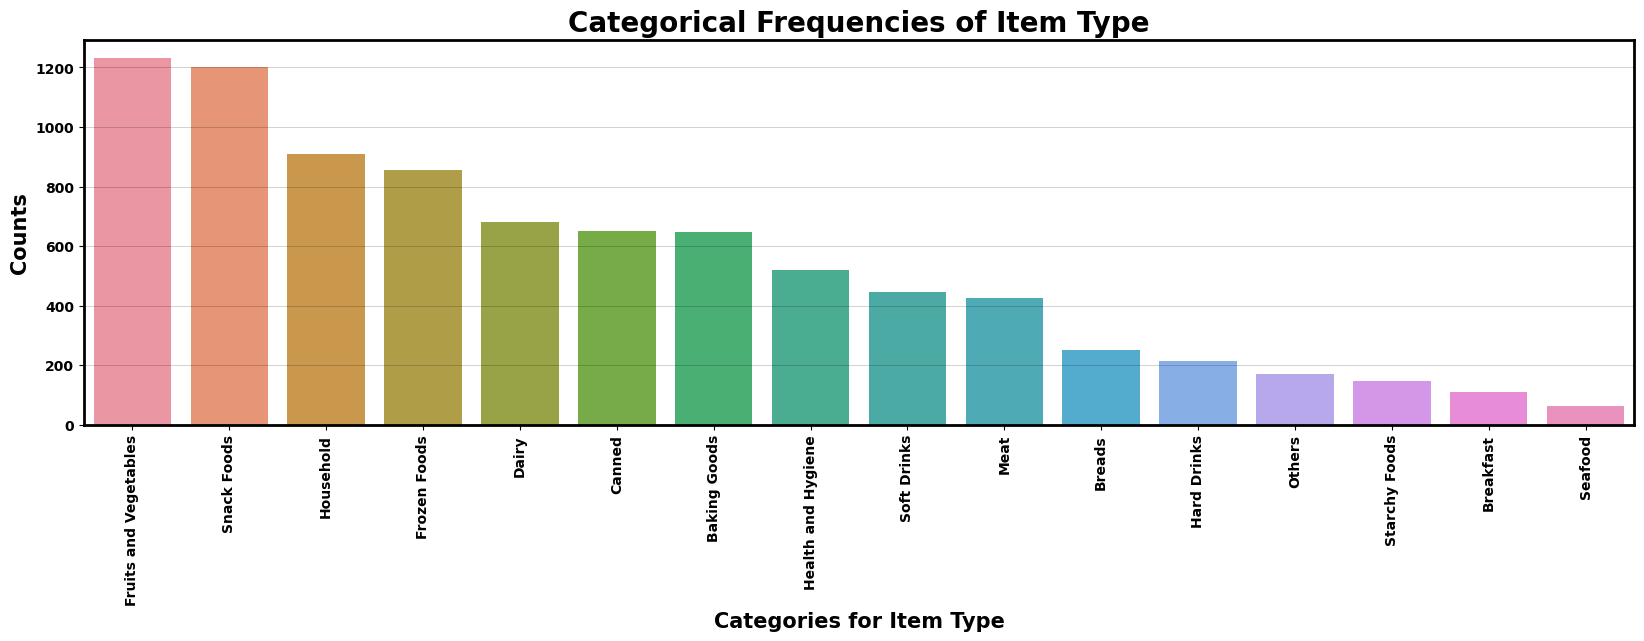

In [ ]:
fig, ax = plot_bar(df_sales, 'Item_Type', 'Item Type')
print(df_sales['Item_Type'].value_counts())

- Here we can see that the top five Type that have the most items are as follows:
  - Fruits and Vegetables
  - Snack Foods
  - Household
  - Frozen Foods
  - Dairy

- We can also see that the bottom five type that have the least of the items are as follows:
  - Seafood
  - Breakfast
  - Starchy Foods
  - Others  
  - Hard Drinks

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


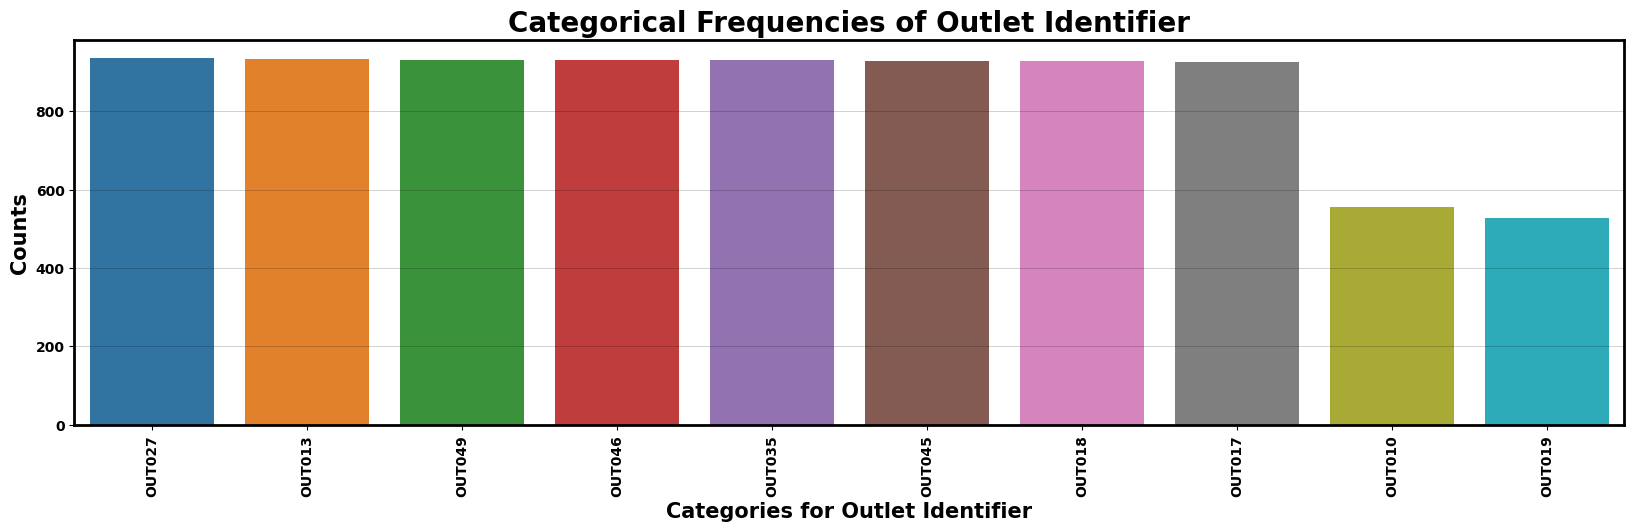

In [ ]:
fig, ax = plot_bar(df_sales, 'Outlet_Identifier', 'Outlet Identifier')
print(df_sales['Outlet_Identifier'].value_counts())

- Here we can see that most outlet indentifiers are OUT027. The least utlet indentifiers are OUT019.

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


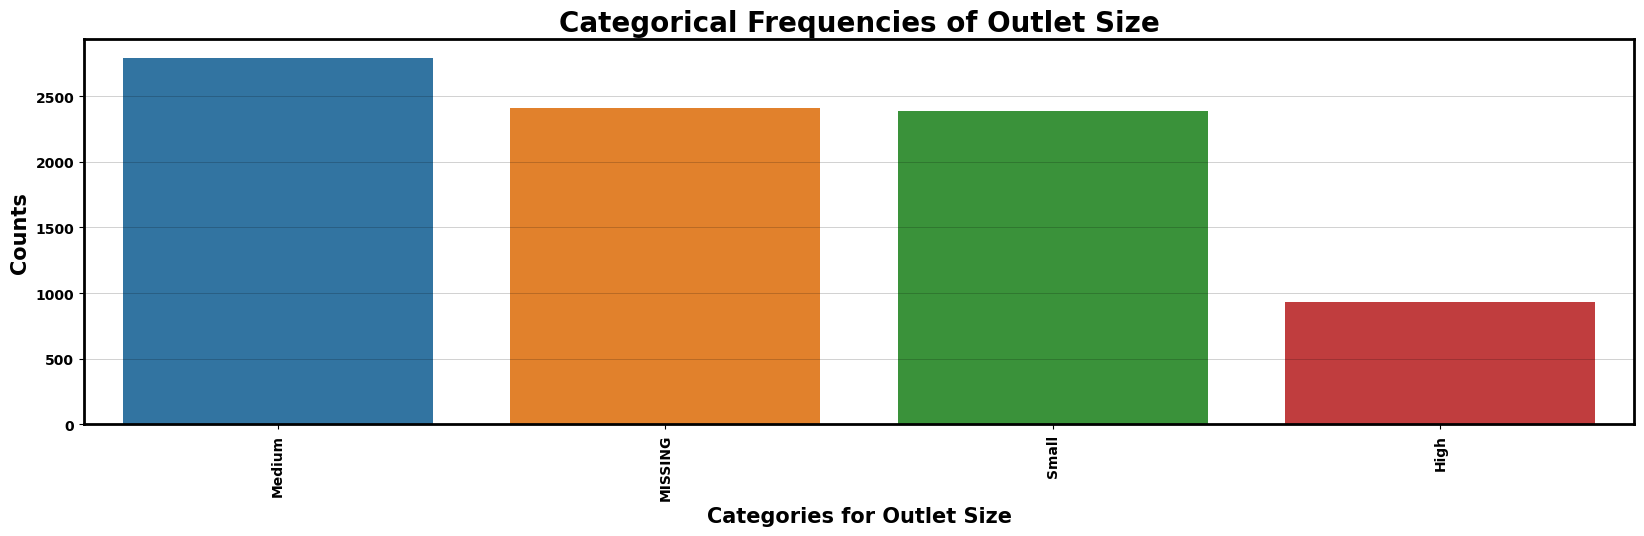

In [ ]:
fig, ax = plot_bar(df_sales, 'Outlet_Size', 'Outlet Size')
print(df_sales['Outlet_Size'].value_counts())

- Here we can see that most outlet indentifiers are OUT027. The least outlet indentifiers are OUT019.

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


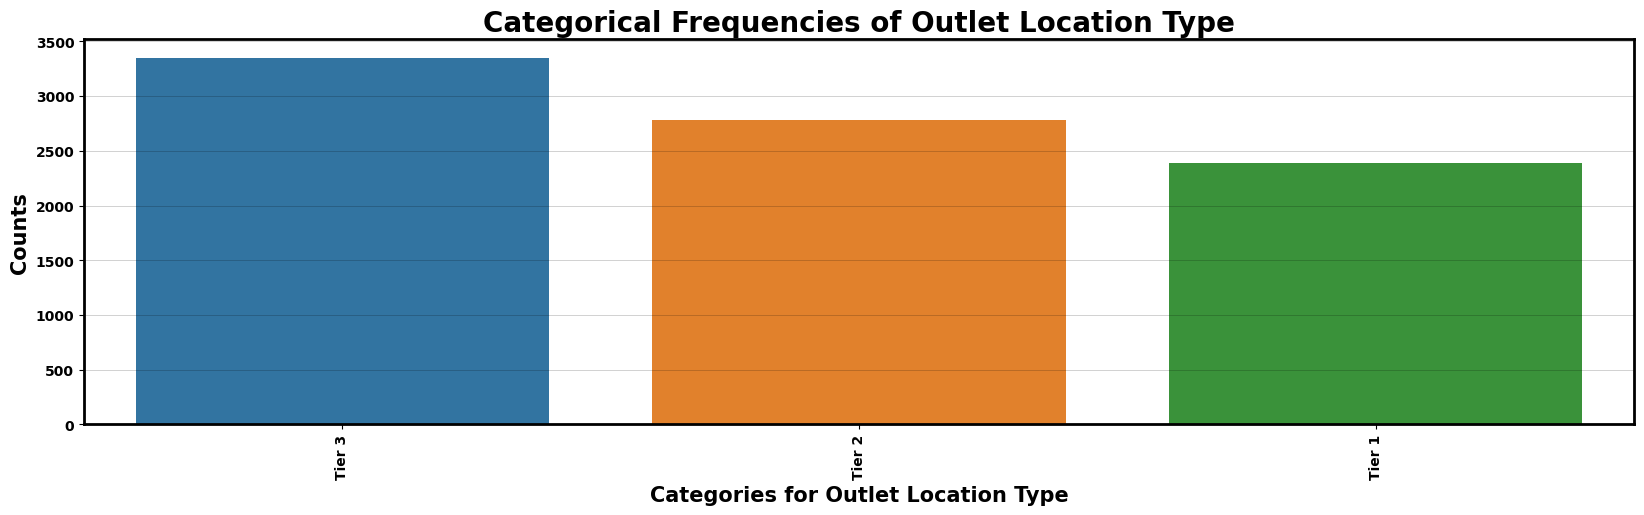

In [ ]:
fig, ax = plot_bar(df_sales, 'Outlet_Location_Type', 'Outlet Location Type')
print(df_sales['Outlet_Location_Type'].value_counts())

- Here we can see that most outlet location type is Tier 3. The least outlet location type is Tier 1.

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


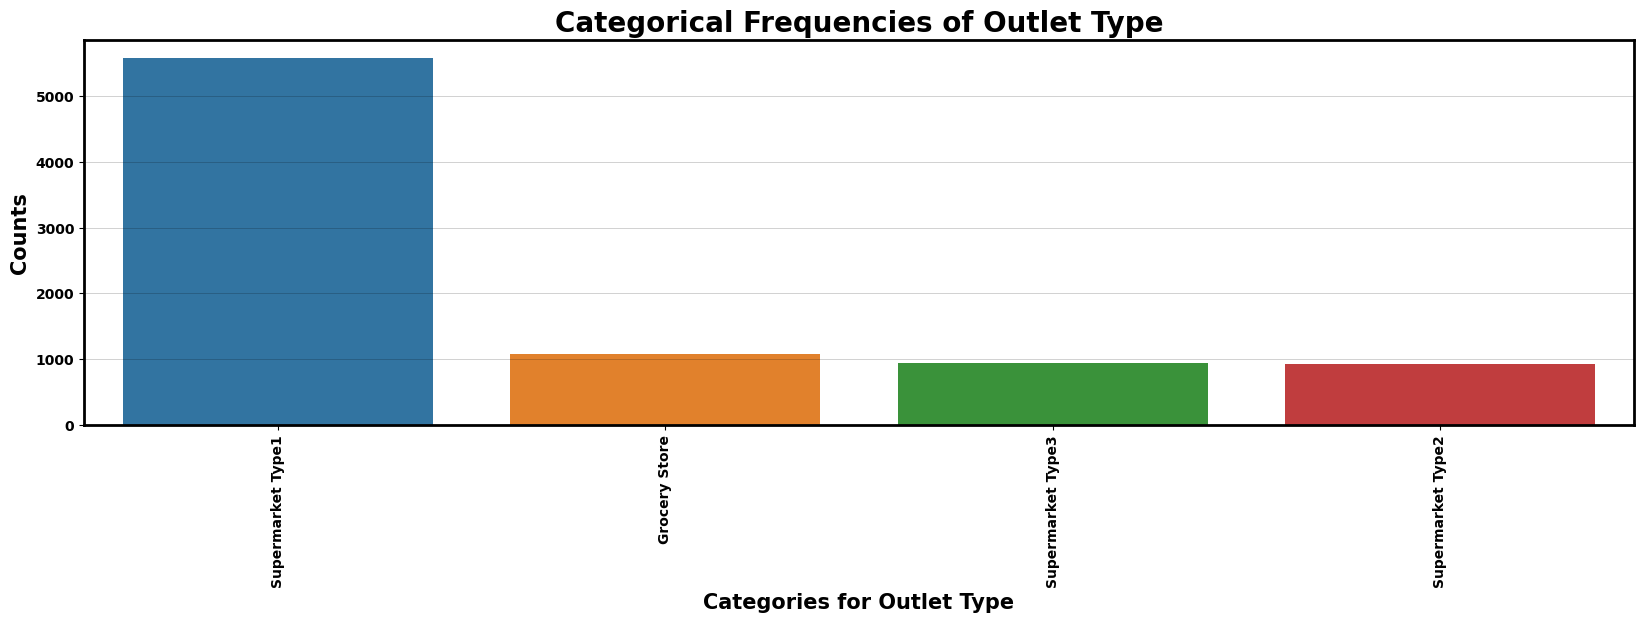

In [ ]:
fig, ax = plot_bar(df_sales, 'Outlet_Type', 'Outlet Type')
print(df_sales['Outlet_Type'].value_counts())

- Here we can see that most outlet type is Suppermarket Type1. The least outlet type is Supermarket Type2.

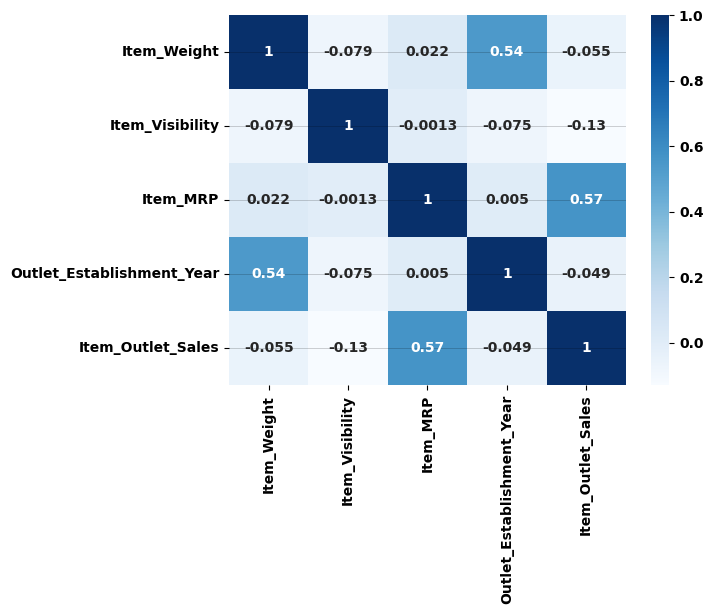

In [ ]:
sns.heatmap(df_sales.corr(),annot=True,cmap='Blues');

- There aren't really any strong or even moderate correlations shown here.
- We also don't any any weak postive correlation

#Part 1: Project 4

We will continue to work on your sales prediction project. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales. The target is Item_Outlet_Sales

For Part 4, your task is to inspect the features:  For feature inspection, we want to be fully aware of any null values present so that we can make informed choices about data preparation for machine learning in the next course. Therefore, before you proceed,  

Remove the placeholders you added in week 2 and replace them with null values.
This will allow our functions to report the presence and frequency of null values as part of our EDA.​

## Remove missing placeholders

In [ ]:
df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace('MISSING',np.nan)
df_sales['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
null_sums1 = df_sales.isna().sum()
null_sums1

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].replace(-1,np.nan)
df_sales['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [ ]:
null_sums1 = df_sales.isna().sum()
null_sums1

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## **Exploratory Data Analysis**

In [ ]:
#### **Custom Functions**

##### **Univariate Functions**

###### **Explore Univariate Categorical Function**

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df_sales, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_sales.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df_sales, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df_sales[x].isna().sum()
  null_perc = null_count/len(df_sales)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df_sales, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df_sales, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df_sales[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df_sales[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df_sales) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


###### **Explore Univariate Numerical Function**

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df_sales, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df_sales.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df_sales[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

##### **Multivariate Functions**

###### **Explore Multivariate Categorical Function**

In [ ]:
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

###### **Explore Multivariate Numerical Function**

In [ ]:
def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

#### **Feature Inspection**

##### **Categorical Features**

###### **Item_Fat_Content**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Fat_Content'
df_sales[feature].dtype

dtype('O')

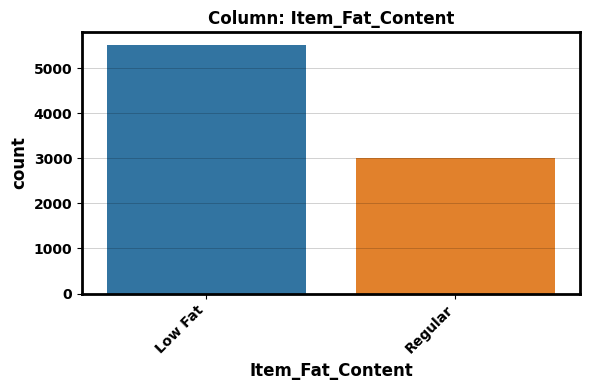

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
# Call Univariate Categorical EDA function
explore_categorical(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (2) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

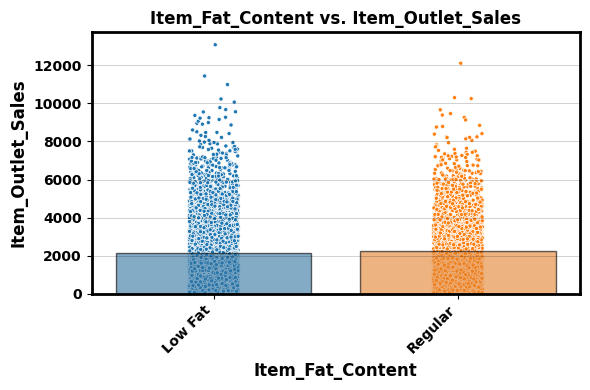

In [ ]:
## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of item outlet sales.

###### **Item_Type**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Type'
df_sales[feature].dtype

dtype('O')

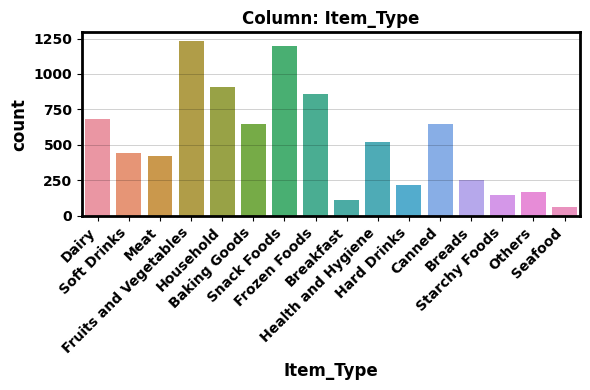

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
# Call Univariate Categorical EDA function
explore_categorical(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - Yes it > 10. We have (16) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

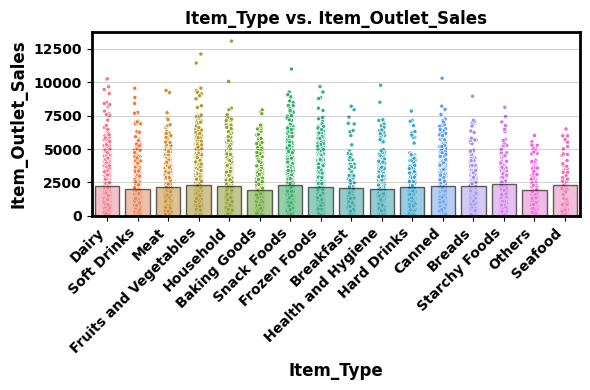

In [ ]:
## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of item outlet sales.

###### **Outlet_Identifier**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Identifier'
df_sales[feature].dtype

dtype('O')

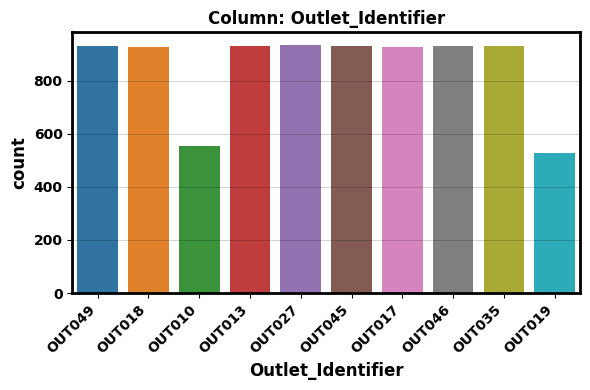

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [ ]:
# Call Univariate Categorical EDA function
explore_categorical(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (10) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

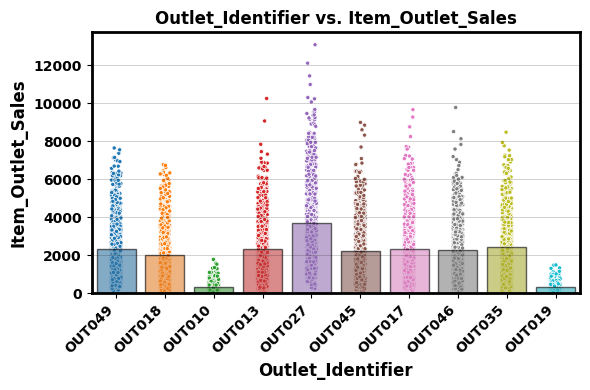

In [ ]:
## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of item outlet sales.

###### **Outlet_Size**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Size'
df_sales[feature].dtype

dtype('O')

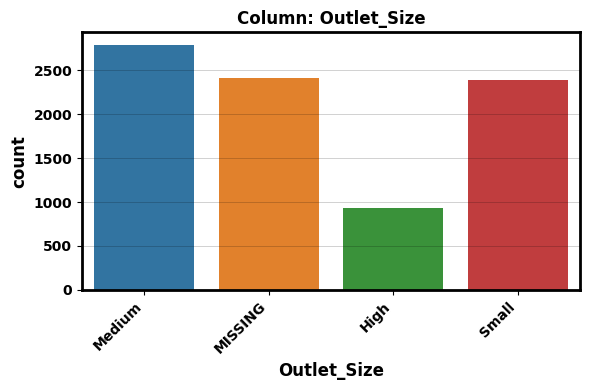

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
# Call Univariate Categorical EDA function
explore_categorical(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (ordinal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - We have 2410 null values value. I will impute them with the most comman value which is Medium.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (4) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

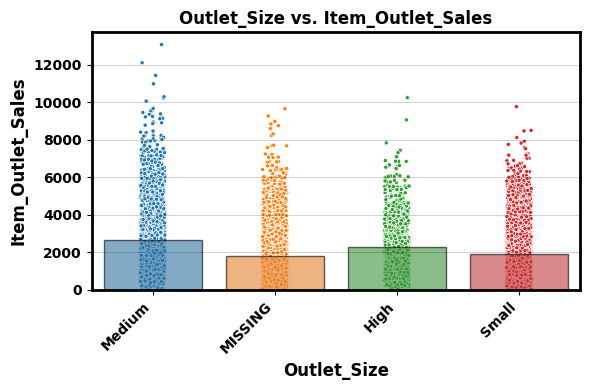

In [ ]:
## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of item outlet sales.

###### **Item_Type**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Type'
df_sales[feature].dtype

dtype('O')

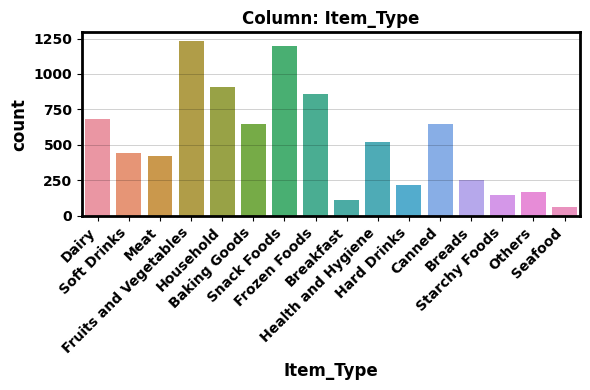

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
# Call Univariate Categorical EDA function
explore_categorical(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (5) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

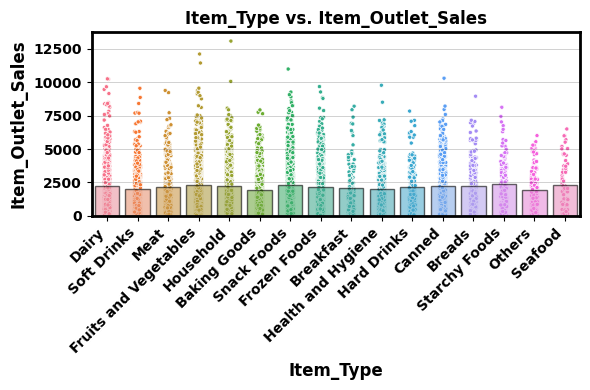

In [ ]:
## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of total sales.

###### **Outlet_Location_Type**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Location_Type'
df_sales[feature].dtype

dtype('O')

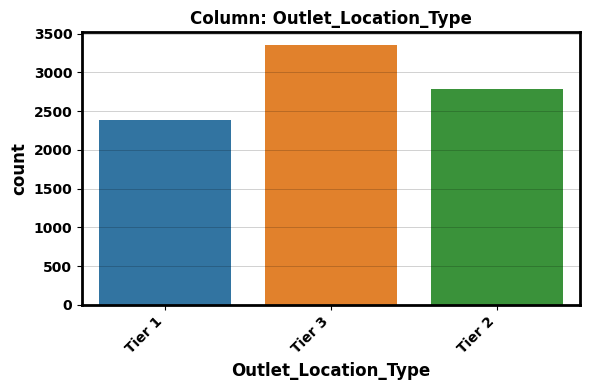

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
# Call Univariate Categorical EDA function
explore_categorical(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (ordinal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (3) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

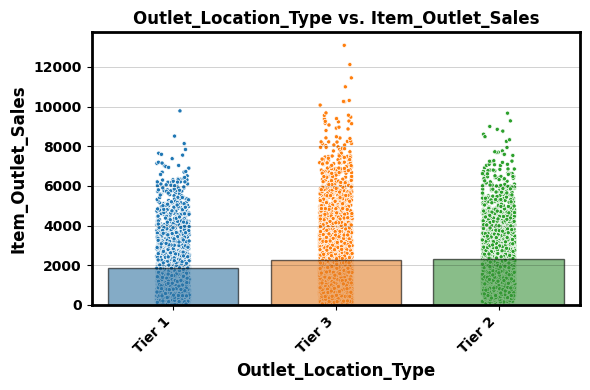

In [ ]:
## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of item outlet sales.

###### **Item_Identifier**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Identifier'
df_sales[feature].dtype

dtype('O')

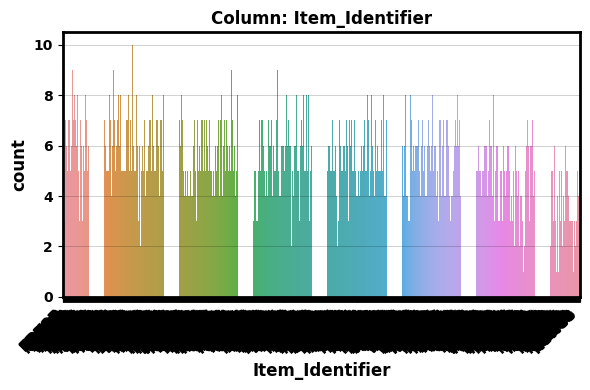

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


In [ ]:
# Call Univariate Categorical EDA function
explore_categorical(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  -Yes, its high (>10). We have (1159) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

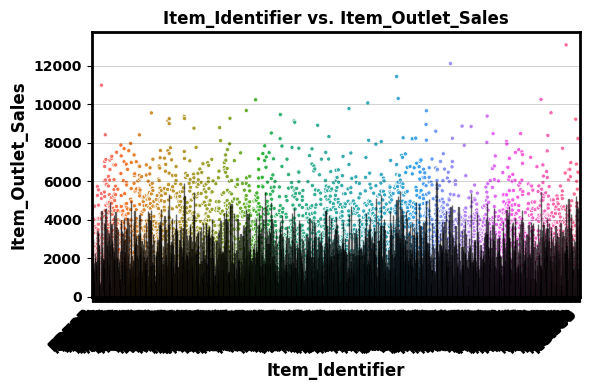

In [ ]:
## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of item outlet sales.

###### **Outlet_Type**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Type'
df_sales[feature].dtype

dtype('O')

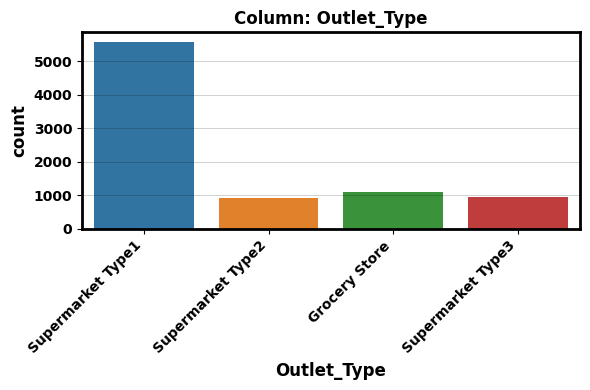

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
# Call Univariate Categorical EDA function
explore_categorical(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is categorical (nominal).
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no missing values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - No there only (4) unique values
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

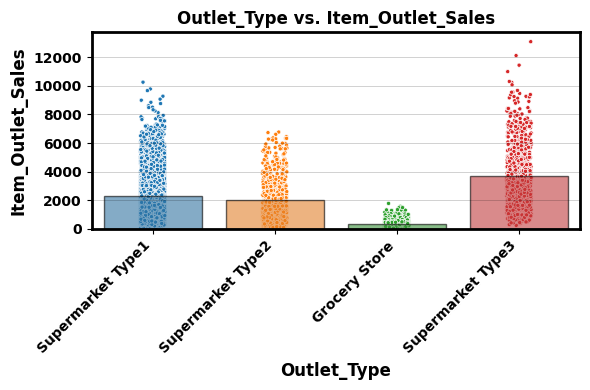

In [ ]:
## Call Multivariate Categorical EDA function
plot_categorical_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - I would expect that this feature is  a direct predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - This feature does seem to be a predictor of item outlet sales.

##### **Numerical Features**

In [ ]:
# save list of numeric column names
num_cols = df_sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

###### **Item_Weight**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Weight'
df_sales[feature].dtype

dtype('float64')

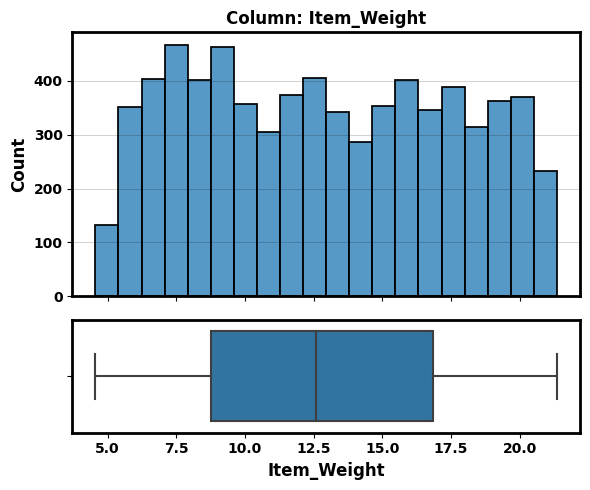

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
## Call Univariate Numerical EDA function
explore_numeric(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
 - There are 0 null values, or 0% of values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

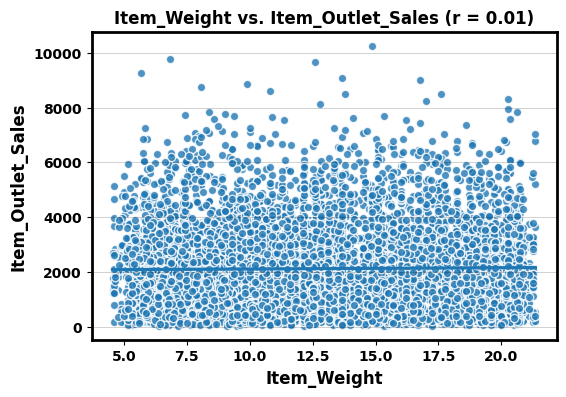

In [ ]:
## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - No, I don't expect this feature to be a predictor of the target.
2. Does this feature appear to be a predictor of the target?
  - No, there is no correlation (r = 0.01) between the feature and the target.

###### **Item_Visibility**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_Visibility'
df_sales[feature].dtype

dtype('float64')

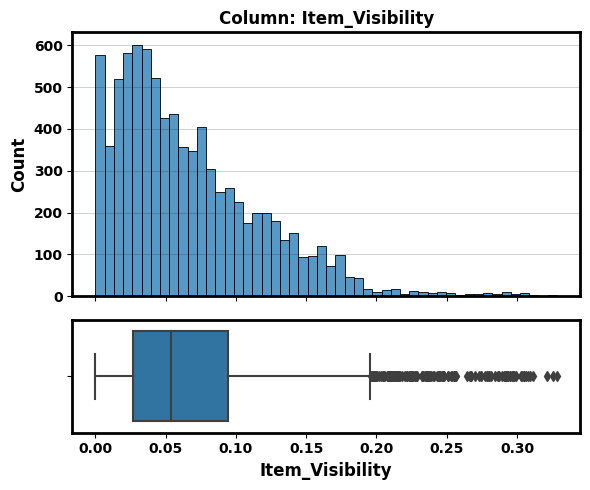

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
## Call Univariate Numerical EDA function
explore_numeric(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are null values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  -  N/A (numeric)
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

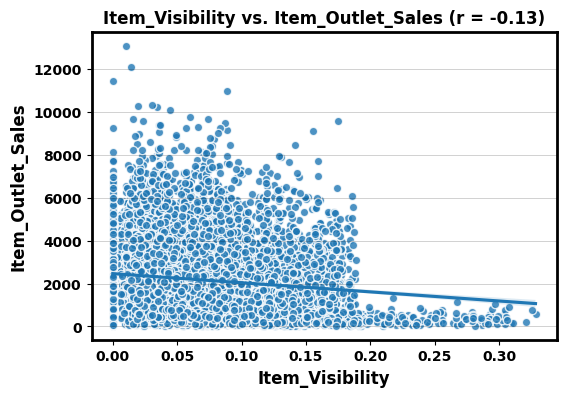

In [ ]:
## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes, I would expect the less the visibility the lower the item outlet sales.
2. Does this feature appear to be a predictor of the target?
  - Yes, there is a moderate negative correlation (r = -0.12) between the feature and the target.

###### **Item_MRP**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Item_MRP'
df_sales[feature].dtype

dtype('float64')

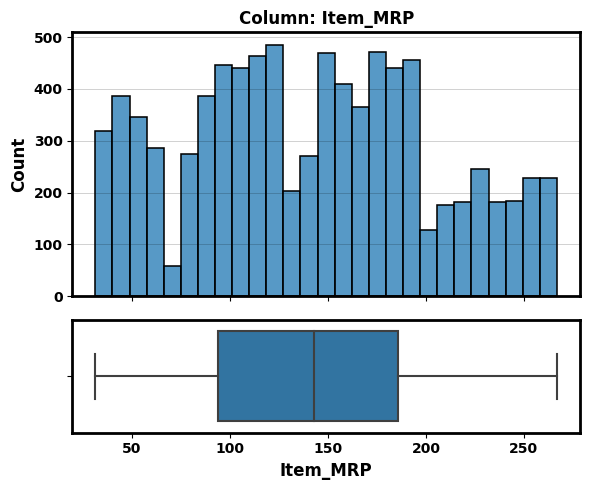

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
## Call Univariate Numerical EDA function
explore_numeric(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no null values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  - N/A (numeric)
5. Would we know this feature before the target is determined?
  - No.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

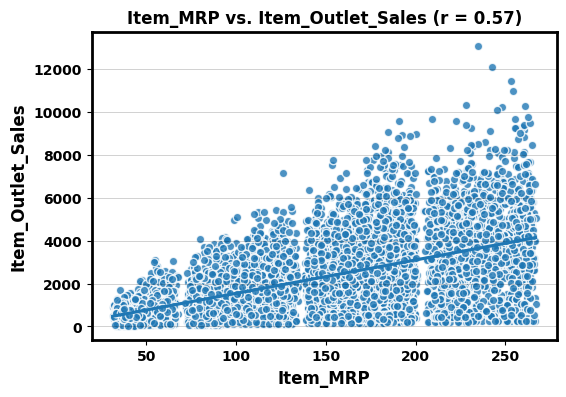

In [ ]:
## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   - Yes, I would expect the greater the item MRP the more item outlet sales.
2. Does this feature appear to be a predictor of the target?
  - Yes, there is a moderate positive correlation (r = 0.57) between the feature and the target.

###### **Outlet_Establishment_Year**




In [ ]:
## Define a variable to identify the feature
## Display the features datatype
feature = 'Outlet_Establishment_Year'
df_sales[feature].dtype

dtype('int64')

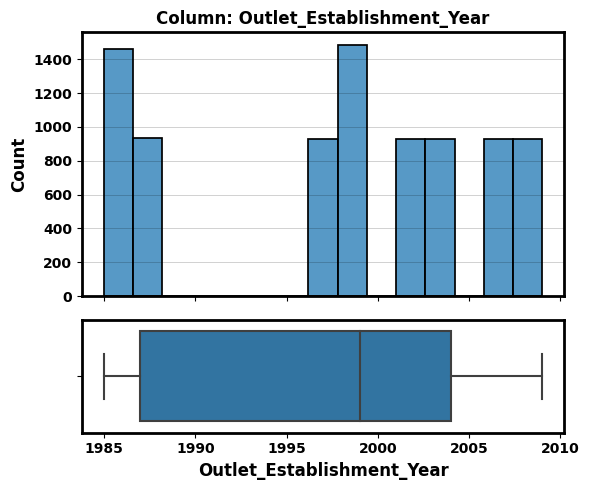

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
## Call Univariate Numerical EDA function
explore_numeric(df_sales, feature);

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - This feature is numeric.
2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
  - There are no null values.
3. Is the feature constant or quasi-constant?
  - The feature is neither constant nor quasi-constant.
4. What is the cardinality? Is it high (>10)?
  -  N/A (numeric)
5. Would we know this feature before the target is determined?
  - Yes.
6. Is there a business case/understanding reason to exclude based on our business case?
  - No, there is not

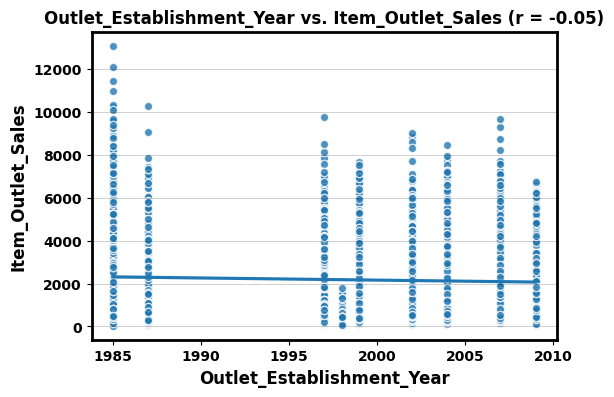

In [ ]:
## Call Multivariate Numerical EDA function
plot_numeric_vs_target(df_sales, feature);

1. Based on your business understanding, would you expect this feature to be a predictor of the target?
   -  Yes, I would expect the lesser the outlest establishment year the lesser the item outlet sales.
2. Does this feature appear to be a predictor of the target?
  - Yes, there is a negative correlation (r = -0.05) between the feature and the target.

#Part 1: Project 5

We will continue to work on your sales prediction project. The goal of this step is to help the retailer by using machine learning to make predictions about future sales based on the data provided.

For Part 5, you will go back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.

You should load a fresh version of the original data set here using pd.read_csv() and start your cleaning process over to ensure there is no data leakage!

Before splitting your data, you can drop duplicates and fix inconsistencies in categorical data.* (*There is a way to do this after the split, but for this project, you may perform this step before the split)
Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.
Perform a train test split
Create a preprocessing object to prepare the dataset for Machine Learning
Make sure your imputation of missing values occurs after the train test split using SimpleImputer

## Load data

In [ ]:
#load the data file path
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
#read the file
df_sales1 = pd.read_csv(fpath)
#preview the first row
df_sales1.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Check for Duplicated

In [ ]:
#Check for duplicates
df_sales1.duplicated().sum()

0

## Check missing

In [ ]:
#Display summary info
df_sales1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Display the total of missing values
df_sales1.isna().sum().sum()

3873

We have total of 3873 missing values

In [ ]:
# Display the sum of missing values for each feature
df_sales1.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Weight have 1463 missing values and Outlet_Size have 2410 missing values

## Check for inconsistency

In [ ]:
# Display desriptive statitistics for all collumns
df_sales1.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Display desriptive statitistics for all collumns
df_sales1.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [ ]:
# Check target for null values
df_sales1['Item_Outlet_Sales'].isna().sum()

0

In [ ]:
# Check ordinal category
df_sales1['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Check ordinal category
df_sales1['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

## Pre-processing

### Define taget(x) and Y

In [ ]:
# split X and y, we are predicting price
target = 'Item_Outlet_Sales'
X = df_sales1.drop(columns=[target]).copy()
y = df_sales1[target].copy()



### Train Test Split and Tuple

In [ ]:
# split training and test

# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30 , random_state=42)

In [ ]:
#check shape of train
X_train.shape

(5966, 11)

In [ ]:
#check shape of test
X_test.shape

(2557, 11)

In [ ]:
#check train data types
X_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

### Create the Pipelines and Tuples for Each Group of Columns


#### 1. Numeric

In [ ]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA

# Save list of number column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Pipeline
num_pipeline = make_pipeline(mean_imputer, scaler)
num_pipeline


Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
# Tuple
numeric_tuple = ('numeric',num_pipeline, num_cols)

#### 2. Ordinal

In [ ]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA

# Save list of number column names
ordinal_cols = ['Outlet_Size', 'Outlet_Location_Type']

# Ordered Category Lists
outlet_size_list = ['Small', 'Medium', 'High']
Outlet_Location_Type_list = ['Tier 1', 'Tier 2', 'Tier 3']

# Transformers

ord = OrdinalEncoder(categories=[outlet_size_list, Outlet_Location_Type_list])
freq_imputer = SimpleImputer(strategy='most_frequent')

# you might have 100 diff cat for ordinal so its getting out of range so good to scale
scaler2 = StandardScaler()

# Pipeline
ord_pipeline = make_pipeline(freq_imputer, ord, scaler2)

# Tuple
ord_tuple = ('ordinal',ord_pipeline, ordinal_cols)


#### 3. Nominal

In [ ]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA

# Save list of nominal column names
nominal_cols = X_train.select_dtypes('object').drop(columns=ordinal_cols).columns

# Transformers

missing_imputer = SimpleImputer(strategy='constant', fill_value='missing')
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Pipeline
nom_pipeline = make_pipeline(missing_imputer , ohe)

# Tuple
ohe_tuple = ('categorical',nom_pipeline, nominal_cols)

In [ ]:
nominal_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Type'],
      dtype='object')

## Create Column Transformer

In [ ]:
# Instantiate the make column transformer
col_transformer = ColumnTransformer([numeric_tuple,
                                       ord_tuple,
                                       ohe_tuple],
                                       remainder='drop', verbose_feature_names_out=False)


## Fit the Column Transformer on the Training Data Only

In [ ]:
# Fit the column transformer on the X_train
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Type'],
      dtype='object'))],
                  verbose_feature_names_out=False)

# Part1: Project 6


## Load data

In [ ]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [ ]:
#load the data file path
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
#read the file
df_sales2 = pd.read_csv(fpath)
#preview the first row
df_sales2.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Check for Duplicated

In [ ]:
#Check for duplicates
df_sales2.duplicated().sum()

0

## Drop unwated columns

In [ ]:
## Dropping EmployeeNumber, WeeklyRate, YearlyRate columns
df_sales2 = df_sales2.drop(columns=['Item_Identifier', 'Outlet_Establishment_Year', 'Item_Type'])
df_sales2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


## Check missing

In [ ]:
#Display summary info
df_sales2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           7060 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_MRP              8523 non-null   float64
 4   Outlet_Identifier     8523 non-null   object 
 5   Outlet_Size           6113 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [ ]:
# Display the total of missing values
df_sales2.isna().sum().sum()

3873

We have total of 3873 missing values

In [ ]:
# Display the sum of missing values for each feature
df_sales2.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

Item_Weight have 1463 missing values and Outlet_Size have 2410 missing values

## Check for inconsistency

In [ ]:
# Display desriptive statitistics for all collumns
df_sales2.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,2181.288914
std,4.643456,0.051598,62.275067,1706.499616
min,4.555000,0.000000,31.290000,33.290000
25%,8.773750,0.026989,93.826500,834.247400
50%,12.600000,0.053931,143.012800,1794.331000
75%,16.850000,0.094585,185.643700,3101.296400
max,21.350000,0.328391,266.888400,13086.964800


In [ ]:
# Display desriptive statitistics for all collumns
df_sales2.describe(include='object')

,Item_Fat_Content,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,6113,8523,8523
unique,5,10,3,3,4
top,Low Fat,OUT027,Medium,Tier 3,Supermarket Type1
freq,5089,935,2793,3350,5577


In [ ]:
# Use .select_dtypes to view only object columns
# Identify string columns
cat_cols = df_sales2.select_dtypes('object').columns
cat_cols

Index(['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# save list of numeric column names
num_cols = df_sales2.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [ ]:
string_cols = df_sales2.select_dtypes("object").columns
string_cols

Index(['Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# Obtain the value counts for all string columns
for col in string_cols:
  print(f"Value Counts for {col}")
  print(df_sales2[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Value Counts for Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Value Counts for Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Value Counts for Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64




In [ ]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean).
for col in num_cols:
  print(f"Summary statistics for {col}:")
  print(f"Min: {df_sales2[col].min()}")
  print(f"Max: {df_sales2[col].max()}")
  print(f"Mean: {df_sales2[col].mean().round(2)}")
  # Increasing readability by adding an empty line
  print('\n')

Summary statistics for Item_Weight:
Min: 4.555
Max: 21.35
Mean: 12.86


Summary statistics for Item_Visibility:
Min: 0.0
Max: 0.328390948
Mean: 0.07


Summary statistics for Item_MRP:
Min: 31.29
Max: 266.8884
Mean: 140.99


Summary statistics for Item_Outlet_Sales:
Min: 33.29
Max: 13086.9648
Mean: 2181.29




## Define X and Y

In [ ]:
# split X and y, we are predicting price
target = 'Item_Outlet_Sales'
X = df_sales2.drop(columns=[target]).copy()
y = df_sales2[target].copy()


## Split

In [ ]:
# split training and test

# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,157.2946,OUT049,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,82.3250,OUT035,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,120.9098,OUT045,NaN,Tier 2,Supermarket Type1


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           5285 non-null   float64
 1   Item_Fat_Content      6392 non-null   object 
 2   Item_Visibility       6392 non-null   float64
 3   Item_MRP              6392 non-null   float64
 4   Outlet_Identifier     6392 non-null   object 
 5   Outlet_Size           4580 non-null   object 
 6   Outlet_Location_Type  6392 non-null   object 
 7   Outlet_Type           6392 non-null   object 
dtypes: float64(3), object(5)
memory usage: 449.4+ KB


In [ ]:
#check shape of train
X_train.shape

(6392, 8)

In [ ]:
#check shape of test
X_test.shape

(2131, 8)

In [ ]:
#check train data types
X_train.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
dtype: object

## Preprocesing

In [ ]:
# Create the preprocessing pipeline for categorical data
# (New) Select columns with make_column_selector
cat_selector = make_column_selector(dtype_include='object')
# Insantiate transfomers
freq_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Instantiate the pipeline
cat_pipe = make_pipeline(freq_imputer, ohe)
# Make a tuple for column transformer
cat_tuple = ('categorical',cat_pipe, cat_selector)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7b2000376ce0>)

In [ ]:
# Create the preprocessing pipeline for numeric data
# (New) Select columns wiht make_column)selector
num_selector = make_column_selector(dtype_include='number')
# Instantiate the transformers
scaler = StandardScaler()
mean_imputer = SimpleImputer(strategy='mean')
# Instantiate the pipeline
num_pipe = make_pipeline(mean_imputer, scaler)
# Make the tuple for ColumnTransformer
num_tuple = ('numeric',num_pipe, num_selector)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 <sklearn.compose._column_transformer.make_column_selector at 0x7b2000375d50>)

In [ ]:
# Create the preprocessing ColumnTransformer
preprocessor = ColumnTransformer([cat_tuple, num_tuple],
                                 verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000376ce0>),
                                ('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000375d50>)],
                  verbose_feature_names_out=False)

In [ ]:
# Fit the preprocessor on training data
preprocessor.fit(X_train)
# Transform the training and test data
X_train_tf = preprocessor.transform(X_train)
X_test_tf = preprocessor.transform(X_test)
X_train_tf.head()


,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
4776,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.817249,-0.712775,1.828109
7510,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.556340,-1.291052,0.603369
5828,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.131512,1.813319,0.244541
5327,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.169219,-1.004931,-0.952591
4810,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.528819,-0.965484,-0.336460


## Linear regretion

In [ ]:
# Instantiate a linear regression model
linreg = LinearRegression()
# Combine the preprocessing ColumnTransformer and the linear regression model in a Pipeline
linreg_pipe = make_pipeline(preprocessor, linreg)
linreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000376ce0>),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000375d50>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
# Fit the model pipeline on the training data
linreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000376ce0>),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000375d50>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
# Obtain Model Evulation using custom function
evaluate_regression(linreg_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 849.135
- MSE = 1,300,565.140
- RMSE = 1,140.423
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 803.687
- MSE = 1,187,857.066
- RMSE = 1,089.889
- R^2 = 0.569


### Compare

Default parameters:

*  Train R2 = 0.561
*  Test R2 = 0.569


##  Random Forest model

In [ ]:
# Instantiate default random forest model
rf = RandomForestRegressor(random_state = 42)
# Model Pipeline
rf_pipe = make_pipeline(preprocessor, rf)

In [ ]:
# Fit the model pipeline on the training data only
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000376ce0>),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000375d50>)],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# Use custom function to evaluate default model
evaluate_regression(rf_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 298.065
- MSE = 183,570.862
- RMSE = 428.452
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 772.198
- MSE = 1,228,760.100
- RMSE = 1,108.495
- R^2 = 0.555


### Compare

Default parameters:

*  Train R2 = 0.938
*  Test R2 = 0.555


## Decision Tree

In [ ]:
# We will start with a default model
# For reproducible results, set the random state
dec_tree = DecisionTreeRegressor(random_state = 42)

In [ ]:
# Combine the preprocessor with the decision tree model in a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

In [ ]:
# Fit the model on the training data only
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000376ce0>),
                                                 ('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000375d50>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
# Make predictions and evalute with custom function
evaluate_regression(dec_tree_pipe, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.000
- MSE = 0.000
- RMSE = 0.000
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 1,039.842
- MSE = 2,229,380.534
- RMSE = 1,493.111
- R^2 = 0.192


In [ ]:
# Looking at options for tuning this model
dec_tree_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse_output=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000376ce0>),
                                   ('numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                         

In [ ]:
# Define dictionary of parameters to tune and the values to try
param_grid = {'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
              'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'decisiontreeregressor__min_samples_split': [2, 3, 4]}


In [ ]:
#Instantiate GridSearchCV
grid_search = GridSearchCV(dec_tree_pipe, param_grid, n_jobs = -1, verbose = 1)

In [ ]:
# Fit the Gridsearch on the training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 330 candidates, totalling 1650 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000376ce0>),
                                                                        ('numeri...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7b2000375d50>)],
                                                          verbose_feature_names_out=False)),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeregressor__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10,
                                                              None],
                         'decisiontreeregressor__min_samples_leaf': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10],
                         'decisiontreeregressor__min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
# Obtain the best combination directly
grid_search.best_params_

{'decisiontreeregressor__max_depth': 5,
 'decisiontreeregressor__min_samples_leaf': 8,
 'decisiontreeregressor__min_samples_split': 2}

In [ ]:
# Now define the best version of the model
best_model = grid_search.best_estimator_

In [ ]:
# Predict and Evaluate with custom function
evaluate_regression(best_model, X_train, y_train, X_test, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 762.579
- MSE = 1,172,170.542
- RMSE = 1,082.668
- R^2 = 0.604

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 738.203
- MSE = 1,118,036.621
- RMSE = 1,057.373
- R^2 = 0.595


### Compare

Default parameters:

*  Train R2 = 1.000
*  Test R2 = 0.192

GridSearch parameters:

*  Train R2 = 0.604
*  Test R2 = 0.595